In [1]:
from math import sin, cos, acos, radians
import collections
from sklearn.model_selection import train_test_split
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split, GridSearchCV
import math
from sklearn.cluster import KMeans
from IPython.display import Image
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.9'

In [4]:
kokkaku = pd.read_csv('kokkaku_1000_hist.csv')
kokkaku_distance = pd.read_csv('kokkaku_distance_1000.csv')

In [5]:
kokkaku.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'avg_neighbor_degree_avg',
       'avg_weighted_neighbor_degree_avg', 'betweenness_centrality_avg',
       'building_area', 'building_proportion', 'center', 'circuity_avg',
       'clean_intersection_count', 'clean_intersection_density_km',
       'clustering_coefficient_avg',
       'clustering_coefficient_weighted_avg', 'degree_centrality_avg',
       'diameter', 'edge_density_km', 'edge_length_avg',
       'edge_length_total', 'int_0_count', 'int_0_prop', 'int_1_count',
       'int_1_prop', 'int_2_count', 'int_2_prop', 'int_3_count',
       'int_3_prop', 'int_4_count', 'int_4_prop', 'intersection_count',
       'intersection_density_km', 'k_avg', 'm', 'n', 'node_density_km',
       'pagerank_max', 'pagerank_max_node', 'pagerank_min',
       'pagerank_min_node', 'radius', 'self_loop_proportion',
       'street_density_km', 'street_length_avg', 'street_length_total',
       'street_segments_count', 'streets_per_node_avg',
       'closeness_centrali

In [7]:
kokkaku = kokkaku.iloc[:,2:]

In [8]:
kokkaku.head()

,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,betweenness_centrality_avg,building_area,building_proportion,center,circuity_avg,clean_intersection_count,clean_intersection_density_km,clustering_coefficient_avg,...,252,264,276,288,300,312,324,336,348,hist-std
0,2.055556,0.015626,0.124506,2.297682e+06,0.238112,[262656753],1.083378,9.0,0.932681,0.111111,...,0.050000,0.075000,0.025000,0.050000,0.025000,0.050000,0.000000,0.000000,0.025000,0.257660
1,3.180556,0.004945,0.166667,7.430192e+05,0.100828,[292656272],1.020684,5.0,0.678503,0.000000,...,0.000000,0.000000,0.041667,0.000000,0.083333,0.125000,0.000000,0.000000,0.000000,0.310018
2,1.921053,0.007978,0.152735,1.059110e+04,0.001767,[428020552],1.051872,12.0,2.001586,0.087719,...,0.000000,0.030303,0.060606,0.030303,0.030303,0.000000,0.000000,0.030303,0.030303,0.323250
3,2.981481,0.003186,0.198413,1.664818e+05,0.033225,[1256517413],1.046372,3.0,0.598708,0.000000,...,0.062500,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.304366
4,2.301587,0.012286,0.125815,1.700403e+06,0.131744,[463247944],1.093659,6.0,0.464869,0.036508,...,0.057143,0.000000,0.057143,0.000000,0.000000,0.057143,0.028571,0.114286,0.028571,0.245180


In [4]:
kokkaku_kai = kokkaku[[ '0.0', '12.0', '24.0', '36.0', '48.0', '60.0', '72.0',
       '84.0', '96.0', '108.0', '120.0', '132.0', '144.0', '156.0',
       '168.0', '180.0', '192.0', '204.0', '216.0', '228.0', '240.0',
       '252.0', '264.0', '276.0', '288.0', '300.0', '312.0', '324.0',
       '336.0', '348.0', 'mean', 'std', 'total']]

In [5]:
kokkaku_kai['mean']

0      170.660200
1      174.525708
2      160.176273
3      175.895688
4      194.326829
5      190.865147
6      155.483429
7      143.101154
8      160.418222
9      208.804667
10     196.438013
11     137.972500
12     169.349182
13     192.010562
14     200.774250
15     164.204583
16     221.368000
17     180.687667
18     192.836667
19     161.400900
20     165.869000
21     205.000793
22     158.434625
23     178.864100
24     180.126667
25     173.400200
26     178.057538
27     160.279400
28     196.522333
29     185.740316
          ...    
926    200.216000
927    170.186327
928    183.738644
929    171.648443
930    168.234145
931    173.597867
932    197.059833
933    154.646953
934    178.497500
935    198.980987
936    189.132571
937    154.933557
938    198.040185
939    173.269979
940    182.260478
941    201.847000
942    172.212575
943    176.793882
944    175.893242
945    166.464144
946    170.588444
947    172.384815
948    172.731412
949    174.695142
950    195

In [6]:
for i in range(30):
    kokkaku_kai[str(12*i)] = 0
kokkaku_kai['hist-std'] = 0
for i in range(kokkaku_kai.shape[0]):
    for j in range(30):
        kokkaku_kai.iloc[i,j+33] = kokkaku_kai.iloc[i,j] / kokkaku_kai.iloc[i,32]
        kokkaku_kai.iloc[i,-1] += (kokkaku_kai.iloc[i,j+33])**2
    kokkaku_kai.iloc[i,-1] -= (1/30)**2
    kokkaku_kai.iloc[i,-1] = np.sqrt(kokkaku_kai.iloc[i,-1])

/home/nobuhara/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nobuhara/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nobuhara/anaconda3/envs/tester/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [7]:
kokkaku_kai.head()

,0.0,12.0,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,...,252,264,276,288,300,312,324,336,348,hist-std
0,3,0,0,5,0,0,1,3,0,2,...,0.050000,0.075000,0.025000,0.050000,0.025000,0.050000,0.000000,0.000000,0.025000,0.257660
1,0,0,3,1,0,2,0,0,1,0,...,0.000000,0.000000,0.041667,0.000000,0.083333,0.125000,0.000000,0.000000,0.000000,0.310018
2,0,2,6,0,0,1,0,2,2,1,...,0.000000,0.030303,0.060606,0.030303,0.030303,0.000000,0.000000,0.030303,0.030303,0.323250
3,0,1,1,1,0,0,1,0,0,2,...,0.062500,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.304366
4,1,0,1,2,0,1,2,0,3,0,...,0.057143,0.000000,0.057143,0.000000,0.000000,0.057143,0.028571,0.114286,0.028571,0.245180


In [10]:
kokkaku_kai = kokkaku[['0', '12', '24', '36', '48', '60',
       '72', '84', '96', '108', '120', '132', '144', '156', '168', '180',
       '192', '204', '216', '228', '240', '252', '264', '276', '288',
       '300', '312', '324', '336', '348', 'hist-std']]

In [41]:
kokkaku_kai = kokkaku[[ 'clean_intersection_count',
       'street_length_avg', 
       'streets_per_node_avg', 'hist-std']]

In [42]:
#特徴量の正規化（min-maxを利用）
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
kokkaku_norm = mms.fit_transform(kokkaku_kai)

In [43]:
kokkaku_norm

array([[0.03524229, 0.13941638, 0.69749071, 0.1809944 ],
       [0.01762115, 0.26975358, 0.44052045, 0.32375916],
       [0.04845815, 0.15120152, 0.65691645, 0.3598386 ],
       ...,
       [0.01321586, 0.25650087, 0.44052045, 0.35703699],
       [0.10572687, 0.12966916, 0.50683535, 0.07481602],
       [0.0969163 , 0.13212909, 0.74179592, 0.07857151]])

In [44]:
pred = KMeans(n_clusters=8).fit_predict(kokkaku_norm)

In [45]:
print(pred)

[1 3 6 3 0 3 3 6 3 5 1 2 6 6 2 5 2 2 2 5 6 0 3 5 3 6 5 3 3 6 5 5 3 3 1 5 5
 2 1 6 3 5 0 5 5 3 0 6 5 1 3 6 5 3 3 3 3 3 3 2 3 6 3 0 3 5 1 0 6 5 0 7 1 1
 0 0 0 3 2 3 0 5 3 7 3 3 5 0 3 3 0 5 3 6 3 5 0 5 6 1 0 0 7 0 3 3 1 1 4 7 4
 6 7 1 5 3 0 5 0 1 1 0 1 1 1 0 0 1 0 7 1 4 7 1 4 3 0 1 1 3 3 3 0 7 1 0 7 0
 0 6 3 2 0 1 4 1 7 1 6 7 0 3 1 0 1 4 7 7 0 1 7 1 0 1 0 7 4 1 1 3 5 7 0 3 5
 3 3 0 7 1 6 6 0 3 1 1 5 6 0 0 0 0 0 3 0 0 0 0 6 2 2 0 0 0 0 0 6 5 0 7 5 5
 0 1 0 7 3 3 5 2 0 6 6 0 5 0 3 1 7 5 0 0 0 6 0 3 7 2 2 6 1 0 1 3 0 1 0 1 1
 5 0 7 1 1 1 1 0 6 3 1 3 0 1 2 3 1 1 6 6 7 6 5 5 7 1 7 1 5 6 1 0 7 0 3 6 1
 7 1 0 0 3 0 0 1 0 6 1 7 1 1 7 7 1 7 7 0 1 5 0 1 2 7 0 0 7 3 1 3 6 1 1 0 3
 3 1 0 2 7 3 1 6 0 0 3 3 5 2 0 6 1 3 2 0 0 2 3 6 0 1 2 3 1 6 0 5 2 0 5 1 5
 6 3 2 1 7 1 3 3 6 7 3 6 1 5 3 2 3 6 2 6 6 0 0 1 0 0 1 1 6 0 3 0 7 1 0 0 2
 7 1 3 0 1 1 1 1 1 0 0 0 3 0 0 0 5 1 1 0 2 0 5 3 0 5 0 1 6 1 3 6 0 1 0 2 0
 7 5 3 0 0 0 6 7 0 1 3 1 1 3 2 6 1 0 0 1 0 3 5 1 5 5 2 7 0 1 0 7 6 1 1 7 0
 1 5 3 6 3 7 0 1 2 6 1 7 

In [46]:
kokkaku_kai['cluster_id'] = pred

/home/nobuhara/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
kokkaku_kai[kokkaku_kai['cluster_id'] == 1]

,clean_intersection_count,street_length_avg,streets_per_node_avg,hist-std,cluster_id
0,9.0,665.948500,2.500000,0.257660,1
10,27.0,403.197951,2.301887,0.222895,1
34,19.0,509.101765,2.266667,0.257701,1
38,22.0,668.484500,2.315789,0.215429,1
49,23.0,502.070200,2.553191,0.228074,1
66,11.0,873.397697,2.275862,0.220531,1
72,20.0,657.448500,2.418605,0.256445,1
73,24.0,559.266960,2.500000,0.240512,1
99,29.0,362.351844,2.307692,0.210317,1
106,23.0,549.907209,2.388889,0.211915,1


In [53]:
kokkaku_kai[kokkaku_kai['cluster_id']==0].mean()

clean_intersection_count     11.440594
street_length_avg           833.000558
streets_per_node_avg          2.066419
hist-std                      0.246423
cluster_id                    0.000000
dtype: float64

In [54]:
kokkaku_kai[kokkaku_kai['cluster_id']==1].mean()

clean_intersection_count     23.547511
street_length_avg           550.924941
streets_per_node_avg          2.383429
hist-std                      0.230754
cluster_id                    1.000000
dtype: float64

In [55]:
kokkaku_kai[kokkaku_kai['cluster_id']==2].mean()

clean_intersection_count       1.209302
street_length_avg           2390.594027
streets_per_node_avg           1.506478
hist-std                       0.433833
cluster_id                     2.000000
dtype: float64

In [56]:
kokkaku_kai[kokkaku_kai['cluster_id']==3].mean()

clean_intersection_count       5.106061
street_length_avg           1132.552356
streets_per_node_avg           1.823763
hist-std                       0.293521
cluster_id                     3.000000
dtype: float64

In [57]:
kokkaku_kai[kokkaku_kai['cluster_id']==4].mean()

clean_intersection_count    149.172414
street_length_avg           249.550212
streets_per_node_avg          2.889086
hist-std                      0.218282
cluster_id                    4.000000
dtype: float64

In [58]:
kokkaku_kai[kokkaku_kai['cluster_id']==5].mean()

clean_intersection_count       2.454545
street_length_avg           1561.908268
streets_per_node_avg           1.628462
hist-std                       0.367938
cluster_id                     5.000000
dtype: float64

In [59]:
kokkaku_kai[kokkaku_kai['cluster_id']==6].mean()

clean_intersection_count     16.618182
street_length_avg           655.770941
streets_per_node_avg          2.330748
hist-std                      0.300550
cluster_id                    6.000000
dtype: float64

In [60]:
kokkaku_kai[kokkaku_kai['cluster_id']==7].mean()

clean_intersection_count     41.941176
street_length_avg           405.962382
streets_per_node_avg          2.671801
hist-std                      0.243622
cluster_id                    7.000000
dtype: float64

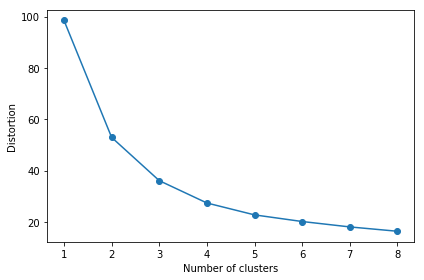

In [64]:
distortions = []
for i in range(1,9):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(kokkaku_norm)
    distortions.append(km.inertia_)

plt.plot(range(1,9), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

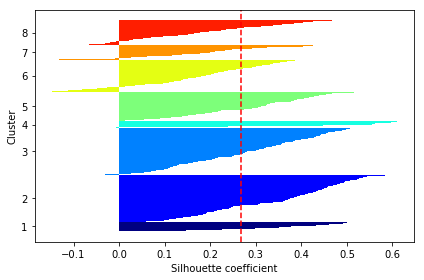

In [66]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=8, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(kokkaku_norm)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(kokkaku_norm, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

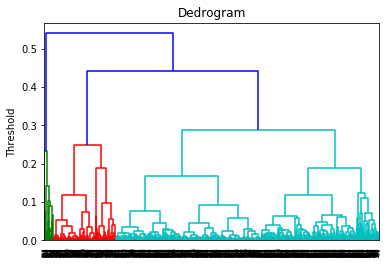

In [67]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(kokkaku_kai, 
                  metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

In [ ]:
#ハズレ値的な道路の削除
#道路の骨格の度合いの指定
#階層的にクラスタリングするか、k-meansなどでクラスタリングするか、
#クラスタリングした際に、そのクラスタに意味をもたせる必要がある
#そのクラスタの中から、ランダムに道路網を表示して、それを選択し、それを親として道路網を派生させていく
#逆にクラスタを複数用意して、それらのクラスタの例を２つずつくらい表示
#その例から、ほしいグラフのタイプを選択する
#その後、まずは骨格から肉付けする方法を考える

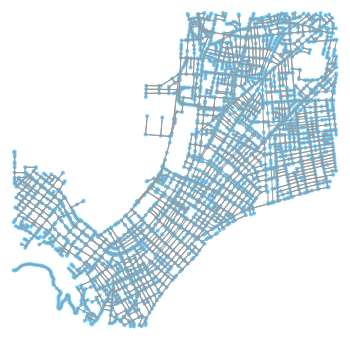

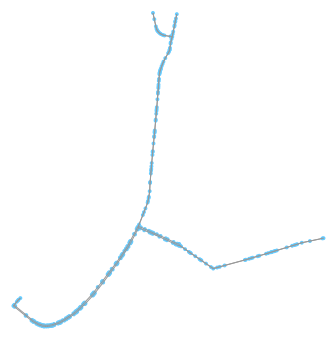

In [181]:
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['motorway','trunk','trunk_link', 'motorway_link']
    gdf = ox.graph_to_gdfs(G, nodes=False)
    gdf
    mask = ~gdf['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf[mask]['u'], gdf[mask]['v'], gdf[mask]['key'])
    G.remove_edges_from(edges)
    G = ox.remove_isolated_nodes(G)
    #G = ox.simplify_graph(G)
    fig, ax = ox.plot_graph(ox.project_graph(G))

In [142]:
gdf = ox.graph_to_gdfs(G)

In [143]:
gdf

(                    highway       osmid           x          y  \
 2509425191  traffic_signals  2509425191  140.728131  41.772633   
 5535566398         crossing  5535566398  140.749332  41.771760   
 4139896403  traffic_signals  4139896403  140.713821  41.765712   
 262656607   traffic_signals   262656607  140.731926  41.789458   
 262656666               NaN   262656666  140.729703  41.791552   
 262656753   traffic_signals   262656753  140.728101  41.772749   
 262659311               NaN   262659311  140.732437  41.791450   
 292281667   traffic_signals   292281667  140.714616  41.766402   
 292281669   traffic_signals   292281669  140.713902  41.765784   
 1654777378  traffic_signals  1654777378  140.732865  41.771065   
 262647402   traffic_signals   262647402  140.727996  41.772665   
 
                                   geometry  
 2509425191  POINT (140.7281309 41.7726333)  
 5535566398    POINT (140.7493318 41.77176)  
 4139896403   POINT (140.713821 41.7657124)  
 262656607

In [182]:
#ノードとエッジの追加の仕方
G.add_node(33)
G.nodes[33]['x'] = 140.730703
G.nodes[33]['y'] = 41.791552
G.add_edge(33,262656666)

0

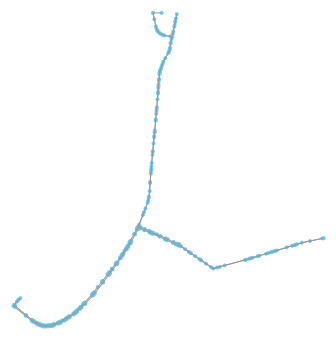

In [183]:
fig, ax = ox.plot_graph(ox.project_graph(G))

In [148]:
#edgeの情報
#{'osmid': 152679615,
#'oneway': True,
#'lanes': '2',
#'ref': '278',
#'highway': 'trunk',
#'maxspeed': '40',
#'length': 11.702}
#nodeの情報
#{'y': 41.7915516, 'x': 140.7297035, 'osmid': 262656666}

In [184]:
G.add_node(32)
G.nodes[32]['x'] = 140.720703
G.nodes[32]['y'] = 41.771552

G.add_node(31)
G.nodes[31]['x'] = 140.720703
G.nodes[31]['y'] = 41.781552

G.add_edge(33,31)
G.add_edge(31,32)

0

In [172]:
#G.remove_edge(33,32)

In [191]:
earth_rad = 6378.137
def latlng_to_xyz(lat, lng):
    rlat, rlng = radians(lat), radians(lng)
    coslat = cos(rlat)
    return coslat*cos(rlng), coslat*sin(rlng), sin(rlat)

def dist_on_sphere(lat1,lon1,lat2,lon2, radius=earth_rad):
    xyz0, xyz1 = latlng_to_xyz(lat1, lon1), latlng_to_xyz(lat2,lon2)
    return acos(sum(x * y for x, y in zip(xyz0, xyz1)))*radius*1000
nodelength = dist_on_sphere(nodes_proj.iloc[-3,1],nodes_proj.iloc[-3,2],nodes_proj.iloc[-1,1],nodes_proj.iloc[-1,2], radius=earth_rad)
nodelength2 = dist_on_sphere(nodes_proj.iloc[-2,1],nodes_proj.iloc[-2,2],nodes_proj.iloc[-1,1],nodes_proj.iloc[-1,2], radius=earth_rad)
print(nodelength)
print(nodelength2)

1388.581898692233
1113.1949060017068


In [193]:
G.edges[33,31,0]['length'] = nodelength
G.edges[31,32,0]['length'] = nodelength2

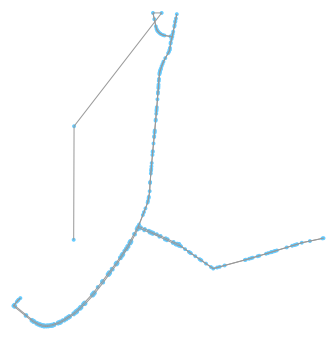

In [194]:
fig, ax = ox.plot_graph(ox.project_graph(G))

In [195]:
G = ox.simplify_graph(G)

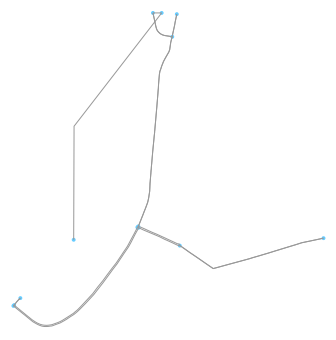

In [196]:
fig, ax = ox.plot_graph(ox.project_graph(G))

In [197]:
G.edges

OutMultiEdgeView([(2509425191, 262647402, 0), (2509425191, 4139896403, 0), (5535566398, 1654777378, 0), (4139896403, 292281669, 0), (262656607, 262656666, 0), (262656607, 262659311, 0), (262656607, 262656753, 0), (262656666, 262656607, 0), (262656753, 2509425191, 0), (262656753, 1654777378, 0), (262656753, 262656607, 0), (262659311, 262656607, 0), (292281667, 292281669, 0), (292281669, 4139896403, 0), (292281669, 292281667, 0), (292281669, 262647402, 0), (1654777378, 5535566398, 0), (1654777378, 2509425191, 0), (262647402, 262656753, 0), (33, 262656666, 0), (33, 32, 0)])

In [187]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False) #ノードの表

In [ ]:
#やｒ